In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

df=pd.read_csv("House Price India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [5]:
print(df.columns)

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')


In [25]:
drop_cols = [col for col in ['id', 'Date', 'Postal Code', 'Lattitude', 'Longitude'] if col in df.columns]
df = df.drop(columns=drop_cols)
df

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,2470,4000,2,51,1400000
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,2940,6600,1,53,1200000
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,3350,42847,3,76,838000
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,2060,4500,1,51,805000
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,2250,17286,3,76,221700
14615,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,1540,7480,3,59,219200
14616,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,1130,6120,2,64,209000
14617,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,1420,6631,3,54,205000


In [33]:
X = df.drop(columns=['Price']) 
y = df['Price'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

Mean Squared Error: 155692911059.40


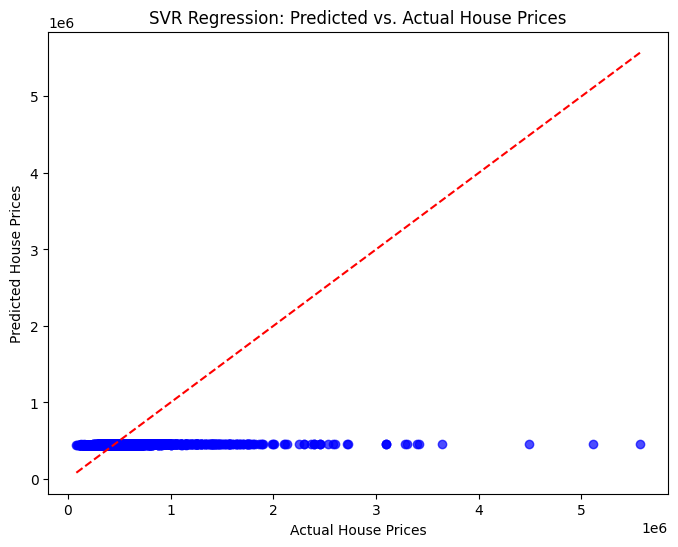

In [31]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("SVR Regression: Predicted vs. Actual House Prices")
plt.show()